# 1) IMPORTING LIBRARIES


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 2) CLONING DATASET

In [11]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY
!git clone https://github.com/Mihir236/covid19data.git


fatal: destination path 'covid19data' already exists and is not an empty directory.


In [12]:
import os

main_dir = "/content/covid19data/DataSet/Data"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [13]:
# MAKING SEPERATE FILES :
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

# 3) PERFORMING DATA VISUALIZATION



['/content/covid19data/DataSet/Data/train/COVID19/COVID19(363).jpg', '/content/covid19data/DataSet/Data/train/COVID19/COVID19(141).jpg', '/content/covid19data/DataSet/Data/train/COVID19/COVID19(83).jpg', '/content/covid19data/DataSet/Data/train/COVID19/COVID-19 (29).jpg', '/content/covid19data/DataSet/Data/train/COVID19/COVID19(571).jpg', '/content/covid19data/DataSet/Data/train/COVID19/COVID19(31).jpg', '/content/covid19data/DataSet/Data/train/COVID19/COVID19(137).jpg', '/content/covid19data/DataSet/Data/train/COVID19/COVID19(349).jpg']
['/content/covid19data/DataSet/Data/train/NORMAL/NORMAL(267).jpg', '/content/covid19data/DataSet/Data/train/NORMAL/NORMAL(1436).jpg', '/content/covid19data/DataSet/Data/train/NORMAL/NORMAL(807).jpg', '/content/covid19data/DataSet/Data/train/NORMAL/NORMAL(626).jpg', '/content/covid19data/DataSet/Data/train/NORMAL/NORMAL(1224).jpg', '/content/covid19data/DataSet/Data/train/NORMAL/NORMAL(280).jpg', '/content/covid19data/DataSet/Data/train/NORMAL/NORMAL(15

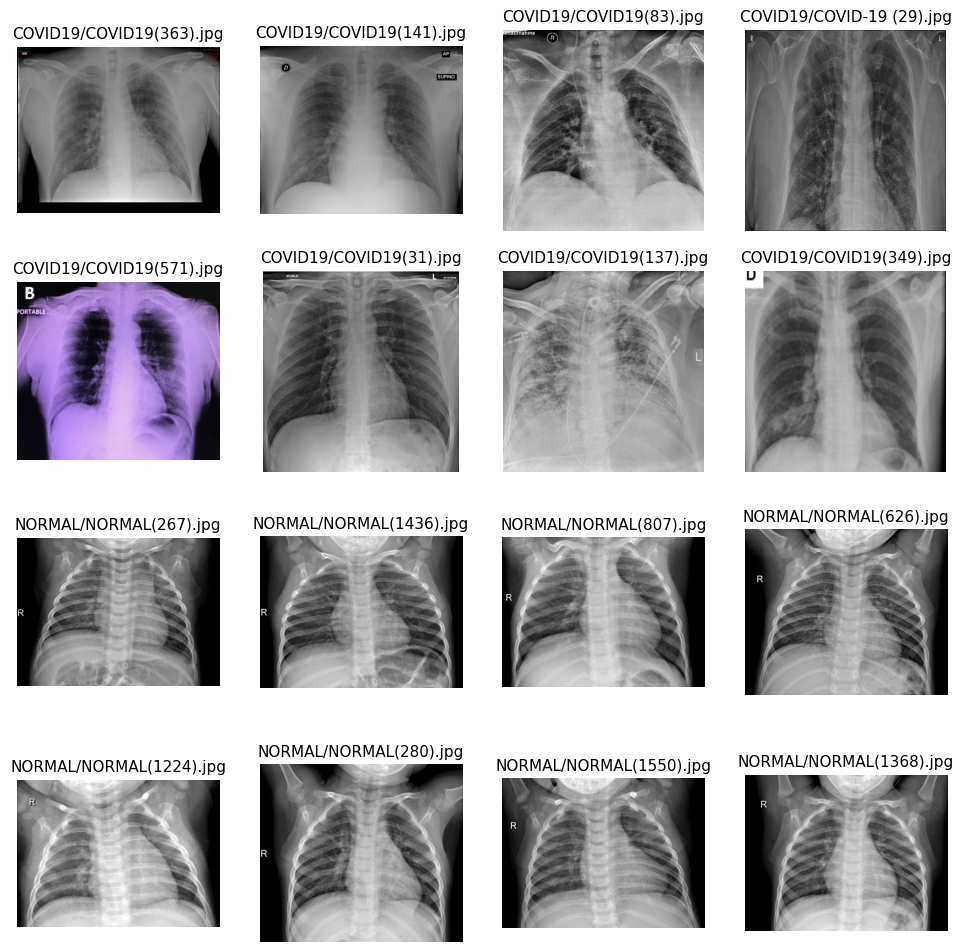

In [14]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

# 4) DATA PREPROCESSING AND AUGMENTATION

In [15]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = "binary")




Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [16]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


# 5) BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,429,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

# 6) COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [18]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# TRAINING THE MODEL
history = model.fit(train_generator,
                    epochs = 35,
                    validation_data = validation_generator)

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 899ms/step - accuracy: 0.6130 - loss: 2.0450 - val_accuracy: 0.7983 - val_loss: 0.4339
Epoch 2/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 772ms/step - accuracy: 0.8404 - loss: 0.3639 - val_accuracy: 0.8702 - val_loss: 0.3035
Epoch 3/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 804ms/step - accuracy: 0.8842 - loss: 0.2994 - val_accuracy: 0.9033 - val_loss: 0.2722
Epoch 4/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 799ms/step - accuracy: 0.9161 - loss: 0.2193 - val_accuracy: 0.8619 - val_loss: 0.3191
Epoch 5/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 820ms/step - accuracy: 0.9105 - loss: 0.2505 - val_accuracy: 0.9365 - val_loss: 0.1583
Epoch 6/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 804ms/step - accuracy: 0.9445 - loss: 0.1647 - val_accuracy: 0.9613 - val_loss: 0.1186
Epoch 7/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 43s 806ms/step - accuracy: 0.9494 - loss: 0.1326 - val_accuracy: 0.9696 - val_loss: 0.0990
Epoch 8/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 819ms/step - accuracy: 0.9512 - loss: 0.1458 - val_accuracy: 0.961

# 7) PERFORMING EVALUATION


In [20]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

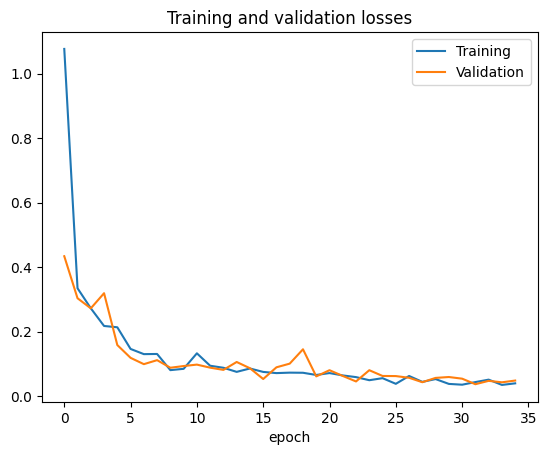

In [21]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

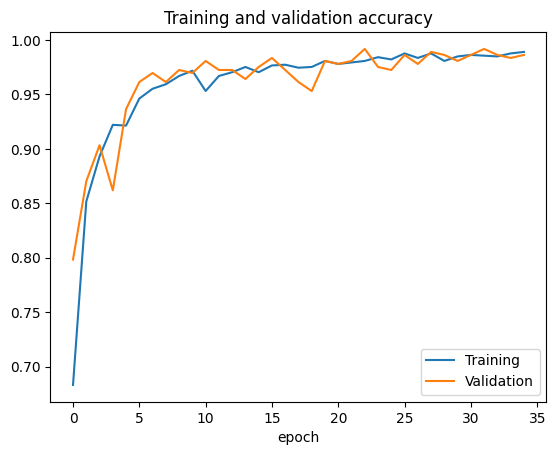

In [22]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [23]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 565ms/step - accuracy: 0.9726 - loss: 0.0950
Test Set Loss :  0.09150401502847672
Test Set Accuracy :  0.9752066135406494


# 9) PREDICTION ON NEW DATA (UPLOAD FILES)

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)

  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

Saving WIN_20201211_12_05_28_Pro.jpg to WIN_20201211_12_05_28_Pro.jpg
The report is COVID-19 Positive


In [ ]:
model.save("model.h5")